In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import acorr_ljungbox

In [2]:
df = pd.read_csv('TIH Expenditure Data_cleaned.csv')

In [3]:
df.dtypes

INVOICE_NO                           object
INVOICE_DT                           object
Payment_Date                         object
PAYMENT_PARTY                        object
NARRATION                            object
INVOICE_VALUE_WITHOUT_GST_OR_TDS    float64
CGST                                float64
SGST                                float64
IGST                                float64
GROSS AMOUNT                        float64
P TAX (-)                           float64
TDS AMOUT (-)                       float64
ROUND UP (+)                        float64
ROUND OFF (-)                       float64
NET AMOUNT PAID                     float64
TDS PERCENTAGE                      float64
PAN NO                               object
PV DATE                              object
PV NO                                object
EXP TYPE                             object
EXPENSE HEAD                         object
PROJECT CODE                         object
GST_Rate                        

In [4]:
df.head()

,INVOICE_NO,INVOICE_DT,Payment_Date,PAYMENT_PARTY,NARRATION,INVOICE_VALUE_WITHOUT_GST_OR_TDS,CGST,SGST,IGST,GROSS AMOUNT,...,ROUND OFF (-),NET AMOUNT PAID,TDS PERCENTAGE,PAN NO,PV DATE,PV NO,EXP TYPE,EXPENSE HEAD,PROJECT CODE,GST_Rate
0,H08105/9/384599,NaN,2024-06-25,HIKAR AIKHI,"COST OF TEA, MILD ETC FOR MOSPI OFFICIAL VISIT",26.0,0.0,0.0,0.0,26.0,...,0.0,26.0,0.000000,NaN,21-06-2024,PV/ISI/IDEAS-TIH/2024-25/01,REVENUE,OFFICE EXPENSES,TIH,0.0
1,H08105/9/938455,NaN,2024-06-25,HIKAR AIKHI,"COST OF TEA, MILD ETC FOR MOSPI OFFICIAL VISIT",683.0,0.0,0.0,0.0,683.0,...,0.0,683.0,0.000000,NaN,21-06-2024,PV/ISI/IDEAS-TIH/2024-25/01,REVENUE,OFFICE EXPENSES,TIH,0.0
2,NIL,NaN,2024-06-24,TRMGN GIMTR,50 % REMAIN SALARY FOR APRIL 2024,115000.0,0.0,0.0,0.0,115000.0,...,0.0,77823.0,32.327826,ACWPB0099A,21-06-2024,PV/ISI/IDEAS-TIH/2024-25/02,REVENUE,SALARY,TIH,0.0
3,NIL,NaN,2024-06-24,KNIS IHN K,50 % REMAIN SALARY FOR APRIL 2024,32500.0,0.0,0.0,0.0,32500.0,...,0.0,32450.0,0.000000,NaN,21-06-2024,PV/ISI/IDEAS-TIH/2024-25/02,REVENUE,SALARY,TIH,0.0
4,NIL,NaN,2024-06-24,HIKAR AIKHI,50 % REMAIN SALARY FOR APRIL 2024,20000.0,0.0,0.0,0.0,20000.0,...,0.0,19980.0,0.000000,NaN,21-06-2024,PV/ISI/IDEAS-TIH/2024-25/02,REVENUE,SALARY,TIH,0.0


In [5]:
df.describe()

,INVOICE_VALUE_WITHOUT_GST_OR_TDS,CGST,SGST,IGST,GROSS AMOUNT,P TAX (-),TDS AMOUT (-),ROUND UP (+),ROUND OFF (-),NET AMOUNT PAID,TDS PERCENTAGE,GST_Rate
count,6.980000e+02,698.000000,698.000000,698.000000,6.980000e+02,698.000000,698.000000,698.000000,698.00000,6.980000e+02,698.000000,696.000000
mean,3.955210e+04,252.488711,252.251246,313.372880,4.037026e+04,38.366762,1591.125802,0.019040,0.02702,3.874102e+04,2.650481,0.022791
std,1.227890e+05,1804.982668,1804.991989,2444.258649,1.235577e+05,71.943088,6440.316207,0.086383,0.47665,1.222439e+05,4.945089,0.054483
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.00000,0.000000e+00,0.000000,0.000000
25%,3.750000e+03,0.000000,0.000000,0.000000,3.823202e+03,0.000000,0.000000,0.000000,0.00000,3.600000e+03,0.000000,0.000000
50%,1.042500e+04,0.000000,0.000000,0.000000,1.180000e+04,0.000000,0.000000,0.000000,0.00000,1.080000e+04,0.000000,0.000000
75%,3.700000e+04,0.000000,0.000000,0.000000,3.700000e+04,0.000000,32.450000,0.000000,0.00000,3.674500e+04,2.000000,0.000000
max,1.997000e+06,30885.120000,30885.120000,36000.000000,1.997000e+06,200.000000,50012.000000,0.500000,12.47000,1.997000e+06,32.327826,0.180001


In [6]:
df_subs = df[df['INVOICE_VALUE_WITHOUT_GST_OR_TDS'] < 250000]
df_subs.head()

,INVOICE_NO,INVOICE_DT,Payment_Date,PAYMENT_PARTY,NARRATION,INVOICE_VALUE_WITHOUT_GST_OR_TDS,CGST,SGST,IGST,GROSS AMOUNT,...,ROUND OFF (-),NET AMOUNT PAID,TDS PERCENTAGE,PAN NO,PV DATE,PV NO,EXP TYPE,EXPENSE HEAD,PROJECT CODE,GST_Rate
0,H08105/9/384599,NaN,2024-06-25,HIKAR AIKHI,"COST OF TEA, MILD ETC FOR MOSPI OFFICIAL VISIT",26.0,0.0,0.0,0.0,26.0,...,0.0,26.0,0.000000,NaN,21-06-2024,PV/ISI/IDEAS-TIH/2024-25/01,REVENUE,OFFICE EXPENSES,TIH,0.0
1,H08105/9/938455,NaN,2024-06-25,HIKAR AIKHI,"COST OF TEA, MILD ETC FOR MOSPI OFFICIAL VISIT",683.0,0.0,0.0,0.0,683.0,...,0.0,683.0,0.000000,NaN,21-06-2024,PV/ISI/IDEAS-TIH/2024-25/01,REVENUE,OFFICE EXPENSES,TIH,0.0
2,NIL,NaN,2024-06-24,TRMGN GIMTR,50 % REMAIN SALARY FOR APRIL 2024,115000.0,0.0,0.0,0.0,115000.0,...,0.0,77823.0,32.327826,ACWPB0099A,21-06-2024,PV/ISI/IDEAS-TIH/2024-25/02,REVENUE,SALARY,TIH,0.0
3,NIL,NaN,2024-06-24,KNIS IHN K,50 % REMAIN SALARY FOR APRIL 2024,32500.0,0.0,0.0,0.0,32500.0,...,0.0,32450.0,0.000000,NaN,21-06-2024,PV/ISI/IDEAS-TIH/2024-25/02,REVENUE,SALARY,TIH,0.0
4,NIL,NaN,2024-06-24,HIKAR AIKHI,50 % REMAIN SALARY FOR APRIL 2024,20000.0,0.0,0.0,0.0,20000.0,...,0.0,19980.0,0.000000,NaN,21-06-2024,PV/ISI/IDEAS-TIH/2024-25/02,REVENUE,SALARY,TIH,0.0


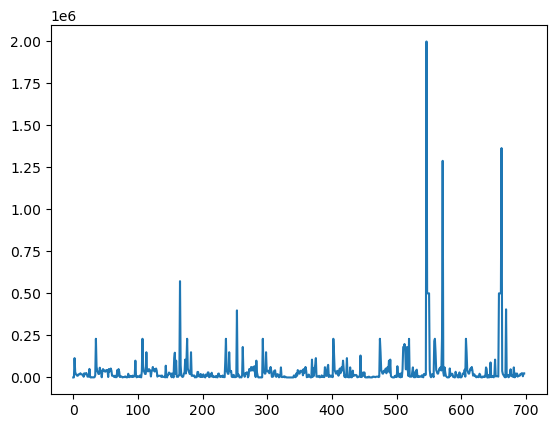

In [7]:
plt.plot(df['GROSS AMOUNT'], marker="")
plt.show()


In [8]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

# ---  Function to perform and interpret ADF test ---
def perform_adf_test(series, series_name="Time Series"):
    print(f"--- ADF Test Results for: {series_name} ---")
    result = adfuller(series.dropna())

    # Extracting results
    adf_statistic = result[0]
    p_value = result[1]
    n_lags = result[2]
    n_obs = result[3]
    critical_values = result[4]

    print(f'ADF Statistic: {adf_statistic:.4f}')
    print(f'p-value: {p_value:.4f}')
    print(f'Number of Lags Used: {n_lags}')
    print(f'Number of Observations Used: {n_obs}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f'\t{key}: {value:.3f}')

    # Interpret the p-value
    alpha = 0.05 # Significance level
    print(f'\nInterpretation (alpha = {alpha}):')
    if p_value <= alpha:
        print("Reject the Null Hypothesis (H0)")
        print("The time series is likely stationary.")
    else:
        print("Fail to Reject the Null Hypothesis (H0)")
        print("The time series is likely non-stationary.")

    # Also compare Test Statistic with Critical Values
    print("\nAlternative Interpretation (Test Statistic vs Critical Values):")
    if adf_statistic < critical_values['1%']:
        print("Test Statistic is less than 1% Critical Value. Strong evidence against H0. Series is stationary.")
    elif adf_statistic < critical_values['5%']:
        print("Test Statistic is less than 5% Critical Value. Moderate evidence against H0. Series is stationary.")
    elif adf_statistic < critical_values['10%']:
        print("Test Statistic is less than 10% Critical Value. Weak evidence against H0. Series is stationary.")
    else:
        print("Test Statistic is greater than all critical values. Fail to reject H0. Series is non-stationary.")
    print("-" * 50 + "\n")

time_series_column = df['GROSS AMOUNT']
perform_adf_test(time_series_column, series_name="Time Series")

--- ADF Test Results for: Time Series ---
ADF Statistic: -10.2886
p-value: 0.0000
Number of Lags Used: 4
Number of Observations Used: 693
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569

Interpretation (alpha = 0.05):
Reject the Null Hypothesis (H0)
The time series is likely stationary.

Alternative Interpretation (Test Statistic vs Critical Values):
Test Statistic is less than 1% Critical Value. Strong evidence against H0. Series is stationary.
--------------------------------------------------



In [9]:
stat, p_value, lags, crit = kpss(time_series_column, regression='ct')  # 'c' = constant (no trend)

print("KPSS Statistic:", stat)
print("p-value:", p_value)
print("Critical Values:", crit)
print("Lags used:", lags)

KPSS Statistic: 0.06810833477992828
p-value: 0.1
Critical Values: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
Lags used: 12


C:\Users\Srija Upadhyay\AppData\Local\Temp\ipykernel_13112\3546749597.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  stat, p_value, lags, crit = kpss(time_series_column, regression='ct')  # 'c' = constant (no trend)


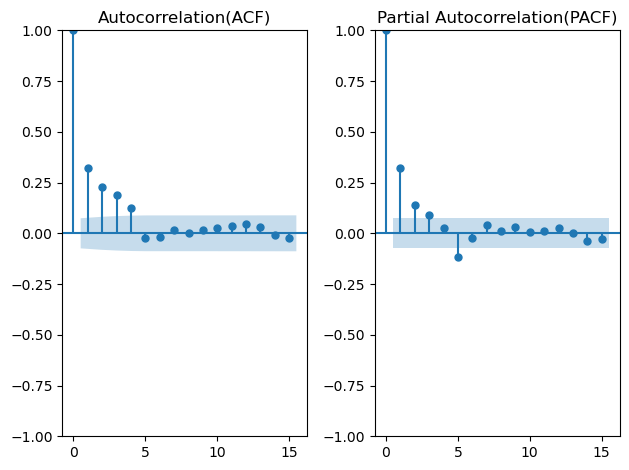

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.subplot(1,2,1)
plot_acf(df['GROSS AMOUNT'], lags = 15, \
            ax = plt.gca(), title = ("Autocorrelation(ACF)"))

plt.subplot(1,2,2)
plot_pacf(df['GROSS AMOUNT'], lags = 15, \
            ax = plt.gca(), title = ("Partial Autocorrelation(PACF)"))

plt.tight_layout()
plt.show()

In [11]:
#Ljung-Box Test for White Noise H0: There is an autocorrelation in the data, i.e. there is a random walk
series = df['GROSS AMOUNT']
lb_test_white_noise = acorr_ljungbox(series, lags=[10], return_df=True)
print(lb_test_white_noise)

       lb_stat     lb_pvalue
10  145.698485  2.855191e-26


########

p : order of autoregression (AR)

q : number of lagged error terms in MA

d : differencing order

###########

In [12]:
df['INVOICE_DT'] = pd.to_datetime(df['INVOICE_DT'], errors='coerce', format='mixed')
df['Payment_Date'] = pd.to_datetime(df['Payment_Date'], errors='coerce', format='mixed')
df['PV DATE'] = pd.to_datetime(df['PV DATE'], errors='coerce', format='mixed')


In [13]:
# Rows where payment date is missing but invoice date is not missing
df.loc[(df['Payment_Date'].isna()==True) & (df['INVOICE_DT'].isna()==False), :]

,INVOICE_NO,INVOICE_DT,Payment_Date,PAYMENT_PARTY,NARRATION,INVOICE_VALUE_WITHOUT_GST_OR_TDS,CGST,SGST,IGST,GROSS AMOUNT,...,ROUND OFF (-),NET AMOUNT PAID,TDS PERCENTAGE,PAN NO,PV DATE,PV NO,EXP TYPE,EXPENSE HEAD,PROJECT CODE,GST_Rate
648,BMT/2024-25/2146,2025-01-29,NaT,TMAR AOM T,"CAR HIRE CHARGES FOR 01.08.20254, 28.08.2024, ...",8160.0,204.00,204.00,0.0,8568.00,...,0.80,8404.0,2.000000,AAHFB4836E,2025-11-03,PV/ISI/IDEAS-TIH/2024-25/435,REVENUE,DOMESTIC TRAVEL EXPENSES,TIH,0.05
652,203,2025-03-11,NaT,RAA.C .HARA,"CONSULTANCY FEE FOR THE MONTH OF JAN, FEB AND ...",90000.0,8100.00,8100.00,0.0,106200.00,...,0.00,97200.0,10.000000,AABFJ8116F,2025-12-03,PV/ISI/IDEAS-TIH/2024-25/438,REVENUE,OTHER ADMINISTRATIVE EXPENSES,TIH,0.18
653,BMT/2024-25/0290,2024-05-11,NaT,TMAR AOM T,"CAR HIRE CHARGES FOR 19.04.2024, 25.04.2024 AN...",6200.0,155.00,155.00,0.0,6510.00,...,0.00,6386.0,2.000000,AAHFB4836E,2024-08-31,PV/ISI/IDEAS-TIH/2024-25/143,REVENUE,DOMESTIC TRAVEL EXPENSES,TIH,0.05
663,HSG-3946640,2025-02-28,NaT,GSAL AAS G,REIMBURSEMENT FOR COST OF KVM8-VPS HOSTING SER...,38492.0,0.00,0.00,0.0,38492.00,...,0.00,38492.0,0.000000,NaN,2025-03-17,PV/ISI/IDEAS-TIH/2024-25/449,REVENUE,OTHER ADMINISTRATIVE EXPENSES,I/TR/19/IIT GUWAHATI,0.00
664,303,2025-01-27,NaT,MCNF NOCM,PAYMENT FOR MISCELLANEOUS EXPENSES INCLUDING T...,20600.0,0.00,0.00,0.0,20600.00,...,0.00,20600.0,0.000000,NaN,2025-11-03,PV/ISI/IDEAS-TIH/2024-25/437,REVENUE,OTHER ADMINISTRATIVE EXPENSES,TIH,0.00
665,8,2025-02-26,NaT,M CNF NOCM,CHARGES FOR VIDEOGRAPHY AND PHOTOGRAPHY SERVIC...,12000.0,1080.00,1080.00,0.0,14160.00,...,0.00,12960.0,10.000000,BFOPS6283R,2025-11-03,PV/ISI/IDEAS-TIH/2024-25/436,REVENUE,OTHER ADMINISTRATIVE EXPENSES,TIH,0.18
666,LKO1-4011526,2025-02-20,NaT,GSAL AAS G,REIMBURSEMENT FOR COST OF 1 NOS RAM 32 GB DDR5...,7309.0,0.00,0.00,0.0,7309.00,...,0.00,7309.0,0.000000,NaN,2025-03-17,PV/ISI/IDEAS-TIH/2024-25/448,REVENUE,OTHER ADMINISTRATIVE EXPENSES,I/TR/19/IIT GUWAHATI,0.00
669,RBE/GST017/24-25,2025-03-18,NaT,TEE B ETE,COST OF 41 NOS STEEL GREY COLOURD TABLE AND 41...,343168.0,30885.12,30885.12,0.0,404938.24,...,0.24,404938.0,0.000000,NaN,2025-03-19,PV/ISI/IDEAS-TIH/2024-25/481,CAPITAL,OFFICE EXPENSES,TIH,0.18
672,SDI/203/24/25,2025-03-06,NaT,FOI D IFO,COST OF ELECTRONIC COMPONNENT FOR POJECT,12750.0,1147.50,1147.50,0.0,15045.00,...,0.00,15045.0,0.000000,NaN,2025-03-19,PV/ISI/IDEAS-TIH/2024-25/469,REVENUE,OTHER ADMINISTRATIVE EXPENSES,I/IS/11/ISI KOLKATA,0.18
676,FITT/24-25/1674,2025-03-18,NaT,TIDOU ONDTI,PAYMENT FOR PORFESSIONAL FEE AND OFFICAL CHARG...,41600.0,0.00,0.00,7200.0,48800.00,...,0.00,44800.0,10.000000,AAAJF0001G,2025-03-21,PV/ISI/IDEAS-TIH/2024-25/489,REVENUE,PATENT,I/IS/11/ISI KOLKATA,0.00


In [14]:
# Replace those payment dates with invoice dates
df.loc[(df['Payment_Date'].isna()==True) & (df['INVOICE_DT'].isna()==False), 'Payment_Date'] = \
df.loc[(df['Payment_Date'].isna()==True) & (df['INVOICE_DT'].isna()==False), 'INVOICE_DT']

In [15]:
# Rows where payment date and invoice date is missing but PV date is not missing
df.loc[(df['Payment_Date'].isna()==True) & (df['INVOICE_DT'].isna()==True) & (df['PV DATE'].isna()==False), :]

,INVOICE_NO,INVOICE_DT,Payment_Date,PAYMENT_PARTY,NARRATION,INVOICE_VALUE_WITHOUT_GST_OR_TDS,CGST,SGST,IGST,GROSS AMOUNT,...,ROUND OFF (-),NET AMOUNT PAID,TDS PERCENTAGE,PAN NO,PV DATE,PV NO,EXP TYPE,EXPENSE HEAD,PROJECT CODE,GST_Rate
649,NIL,NaT,NaT,BABRN RABBA,PAYMENT OF HONORARIUM FOR EVALUATION OF FOUR S...,5000.0,0.0,0.0,0.0,5000.0,...,0.0,4500.0,10.0,AKNPB6714D,2025-11-03,PV/ISI/IDEAS-TIH/2024-25/432,REVENUE,OTHER ADMINISTRATIVE EXPENSES,TIH,0.0
650,NIL,NaT,NaT,BABRN RABBA,REIMBURSEMENT OF TRAVEL EXPENSES FOR EVALUATIO...,964.0,0.0,0.0,0.0,964.0,...,0.0,964.0,0.0,NaN,2025-11-03,PV/ISI/IDEAS-TIH/2024-25/433,REVENUE,DOMESTIC TRAVEL EXPENSES,TIH,0.0
651,NIL,NaT,NaT,ISSEB EASIS,REIMBURSEMENT FOR TRAVEL EXPENSES SPENT BY HIM...,18207.0,0.0,0.0,0.0,18207.0,...,0.0,18207.0,0.0,NaN,2025-11-03,PV/ISI/IDEAS-TIH/2024-25/434,REVENUE,DOMESTIC TRAVEL EXPENSES,TIH,0.0
654,NIL,NaT,NaT,NAAAL AIANA,REIMBURSEMENT FOR THE COST OF STATIONERY AND E...,7433.0,0.0,0.0,0.0,7433.0,...,0.0,7433.0,0.0,NaN,2025-12-03,PV/ISI/IDEAS-TIH/2024-25/439,REVENUE,OTHER ADMINISTRATIVE EXPENSES,I/TR/16/IIIT KALYANI,0.0
655,NIL,NaT,NaT,NAAAL AIANA,REIMBURSEMENT FOR THE COST OF ELECTRONIC COMPO...,8175.0,0.0,0.0,0.0,8175.0,...,0.0,8175.0,0.0,NaN,2025-12-03,PV/ISI/IDEAS-TIH/2024-25/440,REVENUE,OTHER ADMINISTRATIVE EXPENSES,I/TR/16/IIIT KALYANI,0.0
656,NIL,NaT,NaT,NAAAL AIANA,REIMBURSEMENT FOR THE COST OF ELECTRONIC COMPO...,7537.0,0.0,0.0,0.0,7537.0,...,0.0,7537.0,0.0,NaN,2025-12-03,PV/ISI/IDEAS-TIH/2024-25/441,REVENUE,OTHER ADMINISTRATIVE EXPENSES,I/TR/16/IIIT KALYANI,0.0
657,NIL,NaT,NaT,DERUB UHRDE,PAYMENT OF INTERNSHIP FOR THE MONTH OF FEB 2024,5000.0,0.0,0.0,0.0,5000.0,...,0.0,5000.0,0.0,NaN,2025-12-03,PV/ISI/IDEAS-TIH/2024-25/444,REVENUE,OTHER ADMINISTRATIVE EXPENSES,I/TR/16/IIIT KALYANI,0.0
658,NIL,NaT,NaT,NRUX UTR N,PAYMENT OF PRAYAS GRANT,500000.0,0.0,0.0,0.0,500000.0,...,0.0,500000.0,0.0,NaN,2025-03-19,PV/ISI/IDEAS-TIH/2024-25/462,REVENUE,STARTUP,I/ST/34 ZN PRAYAS,0.0
659,NIL,NaT,NaT,CSNQP QONCS,PAYMENT OF PRAYAS GRANT,500000.0,0.0,0.0,0.0,500000.0,...,0.0,500000.0,0.0,NaN,2025-03-19,PV/ISI/IDEAS-TIH/2024-25/461,REVENUE,STARTUP,I/ST/33 IT PRAYAS,0.0
660,NIL,NaT,NaT,AQOIN INOAQ,PAYMENT OF PRAYAS GRANT,500000.0,0.0,0.0,0.0,500000.0,...,0.0,500000.0,0.0,NaN,2025-03-19,PV/ISI/IDEAS-TIH/2024-25/460,REVENUE,STARTUP,I/ST/32 FA PRAYAS,0.0


In [16]:
# For those rows where invoice and payment dates are missing, impute with pv date. 
# But this will contain some discrepancies as pv date is not always in the same month
df.loc[(df['Payment_Date'].isna()==True) & (df['INVOICE_DT'].isna()==True) & (df['INVOICE_DT'].isna()==True) & (df['PV DATE'].isna()==False), 'Payment_Date'] = \
df.loc[(df['Payment_Date'].isna()==True) & (df['INVOICE_DT'].isna()==True) & (df['INVOICE_DT'].isna()==True) & (df['PV DATE'].isna()==False), 'PV DATE']

In [17]:
df.isnull().sum()

INVOICE_NO                            0
INVOICE_DT                          472
Payment_Date                          0
PAYMENT_PARTY                         0
NARRATION                             0
INVOICE_VALUE_WITHOUT_GST_OR_TDS      0
CGST                                  0
SGST                                  0
IGST                                  0
GROSS AMOUNT                          0
P TAX (-)                             0
TDS AMOUT (-)                         0
ROUND UP (+)                          0
ROUND OFF (-)                         0
NET AMOUNT PAID                       0
TDS PERCENTAGE                        0
PAN NO                              540
PV DATE                              62
PV NO                                 0
EXP TYPE                              0
EXPENSE HEAD                          0
PROJECT CODE                          0
GST_Rate                              2
dtype: int64

In [18]:
df_agg_monthly = df.groupby(pd.Grouper(key='Payment_Date', freq='ME'))['GROSS AMOUNT'].sum().reset_index()
df_agg_monthly = df_agg_monthly.set_index('Payment_Date')

# Filter the data for the specified date range
start_date = '2024-04-01'
end_date = '2025-03-31'
df_agg_monthly_filtered = df_agg_monthly[(df_agg_monthly.index >= start_date) & (df_agg_monthly.index <= end_date)]

print(df_agg_monthly_filtered.info())
df_agg_monthly_filtered

df_agg_monthly_filtered.to_csv('MonthlyData_PD.csv')
# Data is reduced to monthly data by summing the payments of each day in a month.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11 entries, 2024-05-31 to 2025-03-31
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GROSS AMOUNT  11 non-null     float64
dtypes: float64(1)
memory usage: 176.0 bytes
None


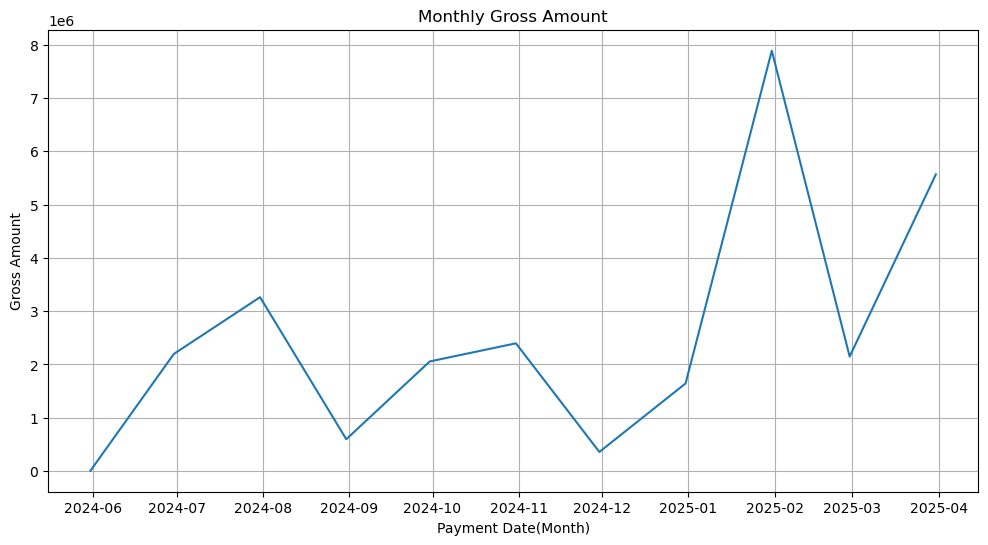

In [19]:
import seaborn as sns
plt.figure(figsize = (12,6))
sns.lineplot(data=df_agg_monthly_filtered, x=df_agg_monthly_filtered.index, y='GROSS AMOUNT')
plt.title('Monthly Gross Amount')
plt.xlabel('Payment Date(Month)')
plt.ylabel('Gross Amount')
plt.grid()
plt.show()

In [20]:
len(df_agg_monthly_filtered)

11

In [21]:
df_agg_monthly_filtered.index

DatetimeIndex(['2024-05-31', '2024-06-30', '2024-07-31', '2024-08-31',
               '2024-09-30', '2024-10-31', '2024-11-30', '2024-12-31',
               '2025-01-31', '2025-02-28', '2025-03-31'],
              dtype='datetime64[ns]', name='Payment_Date', freq=None)

In [22]:
train_data, test_data = df_agg_monthly_filtered['GROSS AMOUNT'][:-3], df_agg_monthly_filtered['GROSS AMOUNT'][-3:]
train_data.info()
print(len(train_data))

<class 'pandas.core.series.Series'>
DatetimeIndex: 8 entries, 2024-05-31 to 2024-12-31
Series name: GROSS AMOUNT
Non-Null Count  Dtype  
--------------  -----  
8 non-null      float64
dtypes: float64(1)
memory usage: 128.0 bytes
8


In [23]:
#ARMA : d=0
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
train_data = train_data.asfreq('ME')

model_arma = ARIMA(train_data, order = (3,0,2), enforce_stationarity=False)
model_arma_fit = model_arma.fit()

predictions_arma = model_arma_fit.predict(
    start = len(train_data),
    end = len(train_data) + len(test_data) - 1, dynamic=False)

mse = mean_squared_error(predictions_arma, test_data)
mae = mean_absolute_error(predictions_arma, test_data)
r2 = r2_score(predictions_arma, test_data)
print(f"MAE: {mae}, MSE: {mse}, R2: {r2}")

MAE: 3705594.7471623425, MSE: 16021490461165.494, R2: -19.064237553025222


C:\Users\Srija Upadhyay\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


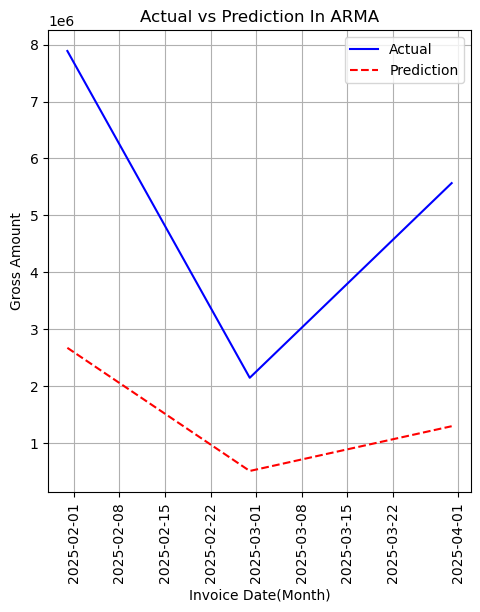

In [24]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.plot(test_data.index, test_data.values, label='Actual', color = 'blue')
plt.plot(test_data.index, predictions_arma.values, label='Prediction', color = 'red', linestyle = "--")
plt.title('Actual vs Prediction In ARMA')
plt.xlabel('Invoice Date(Month)')
plt.xticks(rotation=90)
plt.ylabel('Gross Amount')
plt.legend()
plt.grid()
plt.show()

Since the data is stationary, d=0 in ARIMA model. So ARMA model and ARIMA Model have no difference.

In [25]:
#!pip install pmdarima

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=255.955, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=255.140, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=254.683, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.14 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.15 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=256.183, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.18 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=257.326, Time=0.18 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.846 seconds
MAE: 4618966.036653857, MSE: 26290083059443.582


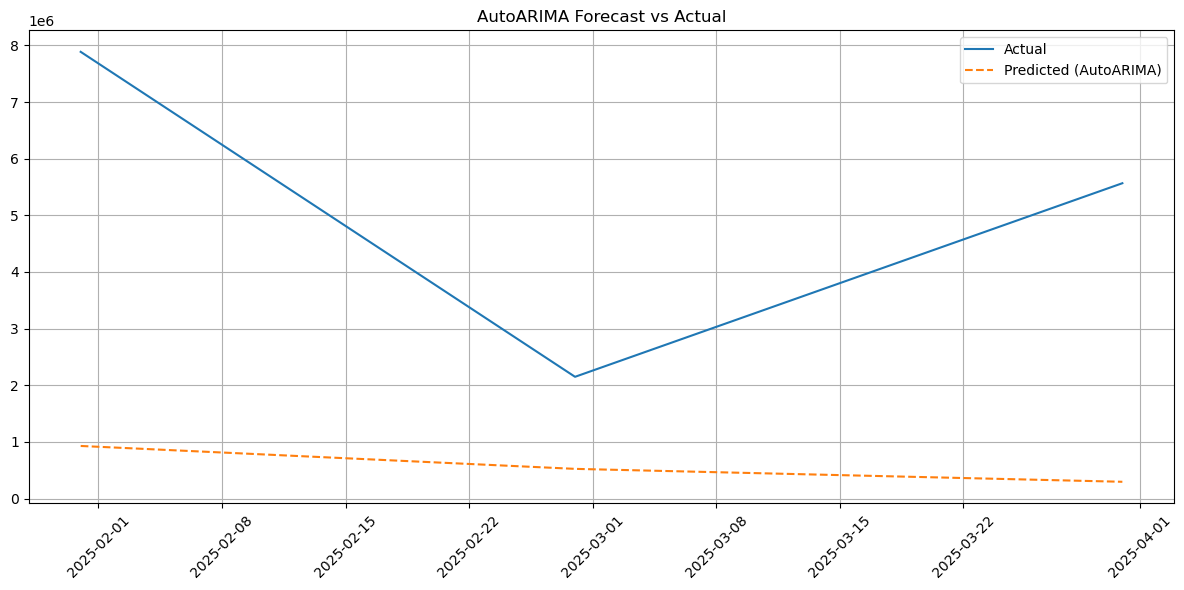

In [26]:
from pmdarima import auto_arima
# Run auto_arima on your training data
stepwise_model = auto_arima(
    train_data,
    start_p=0, start_q=0,
    max_p=10, max_q=10,
    d=None,              # Let auto_arima test for stationarity
    seasonal=False,      # Set to True if your data has seasonality
    trace=True,          # Print model selection steps
    error_action='ignore',
    suppress_warnings=True,
    stepwise= False # if True, model is giving order 0,0,0
)
n_periods = len(test_data)
predictions = stepwise_model.predict(n_periods=n_periods)

mae = mean_absolute_error(test_data, predictions)
mse = mean_squared_error(test_data, predictions)
print(f"MAE: {mae}, MSE: {mse}")

# Plot
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data.values, label='Actual')
plt.plot(test_data.index, predictions, label='Predicted (AutoARIMA)', linestyle='--')
plt.xticks(rotation=45)
plt.legend()
plt.title("AutoARIMA Forecast vs Actual")
plt.grid()
plt.tight_layout()
plt.show()


## Seasonality

<Figure size 1200x300 with 0 Axes>

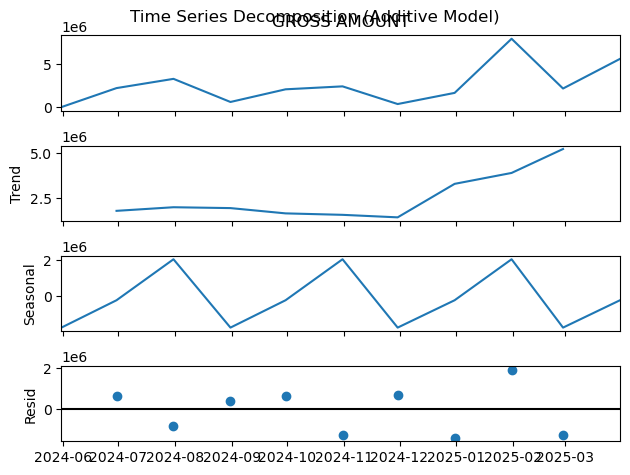

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose 
data=df_agg_monthly_filtered['GROSS AMOUNT']
index=pd.to_datetime(df_agg_monthly_filtered.index)
series=pd.Series(data,index)
result = seasonal_decompose(series, model='additive',period=3)
plt.figure(figsize=(12,3))
fig=result.plot()
plt.suptitle('Time Series Decomposition (Additive Model)')
plt.show()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           GROSS AMOUNT   No. Observations:                    8
Model:                          ARIMA   Log Likelihood                -127.184
Date:                Thu, 10 Jul 2025   AIC                            258.368
Time:                        22:30:31   BIC                            258.527
Sample:                    05-31-2024   HQIC                           257.296
                         - 12-31-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.565e+06   3.01e+06      0.520      0.603   -4.33e+06    7.46e+06
sigma2      9.044e+12   7.25e+12      1.247      0.212   -5.17e+12    2.33e+13
===================================================================================
Ljung-Box (L1) (Q):                   1.03   Jarque-Bera (JB):                 0.53
Prob(Q):                              0.31   Prob(JB):                         0.77
Heteroskedasticity (H):               0.38   Skew:                            -0.06
Prob(H) (two-sided):                  0.44   Kurtosis:                         1.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

2025-01-31    1.565280e+06
2025-02-28    1.565280e+06
2025-03-31    1.565280e+06
Freq: ME, Name: predicted_mean, dtype: float64

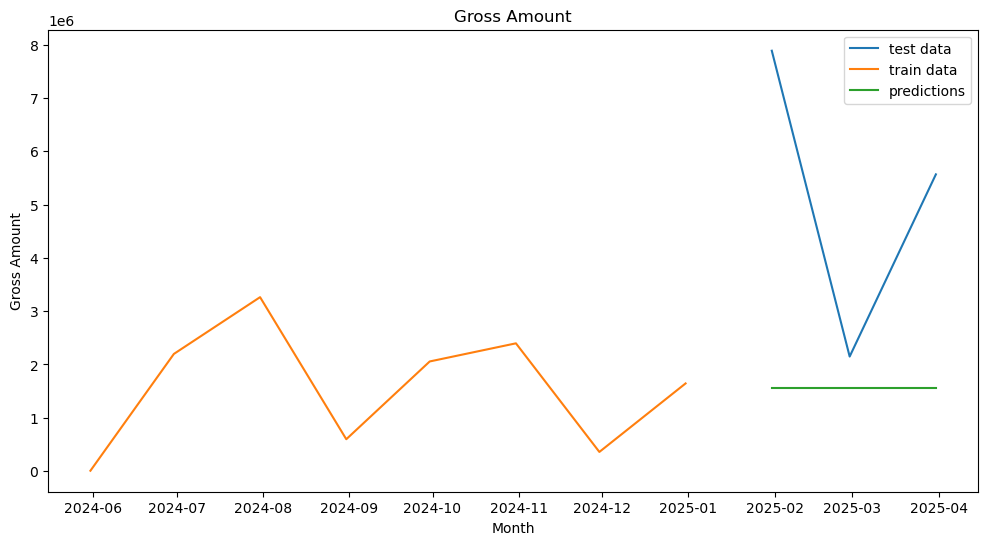

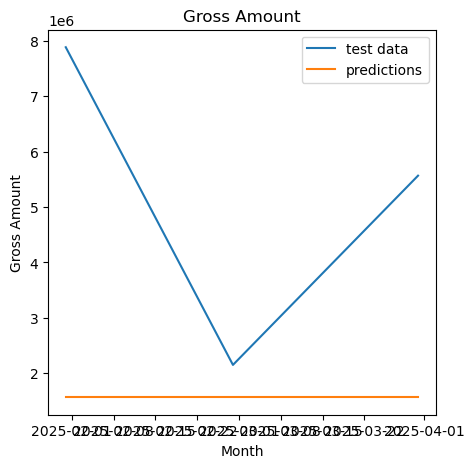

In [28]:
model = ARIMA(train_data, order=(0,0,0),
              seasonal_order=(0,0,0,3))
model_fit = model.fit()
display(model_fit.summary())
forecast = model_fit.forecast(steps=len(test_data))
display(forecast)
predictions = model_fit.predict(start='2025-01-01', end='2025-03-31')
predictions.index=test_data.index
predictions

plt.figure(figsize=(12,6))
# Data for the first plot
x1 = test_data.index
y1 = test_data

# Data for the second plot
x2 = train_data.index
y2 = train_data
# Data for the second plot
x3 = predictions.index
y3 = predictions

# Plot both lines on the same axes
plt.plot(x1, y1, label='test data')
plt.plot(x2, y2, label='train data')
plt.plot(x3, y3, label='predictions')


# Add labels and a legend for clarity

plt.xlabel("Month")
plt.ylabel("Gross Amount")
plt.title("Gross Amount")
plt.legend()

plt.show()
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
# Data for the first plot
x1 = test_data.index
y1 = test_data

# Data for the second plot
x2 = train_data.index
y2 = train_data
# Data for the second plot
x3 = predictions.index
y3 = predictions

# Plot both lines on the same axes
plt.plot(x1, y1, label='test data')
#plt.plot(x2, y2, label='train data')
plt.plot(x3, y3, label='predictions')


# Add labels and a legend for clarity

plt.xlabel("Month")
plt.ylabel("Gross Amount")
plt.title("Gross Amount")
plt.legend()

plt.show()

In [33]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

# Seasonal difference
seasonal_diff = train_data.diff(3).dropna()

# ADF test on seasonal difference
result = adfuller(seasonal_diff)
print("ADF p-value:", result[1])


ADF p-value: 0.12322661147977182


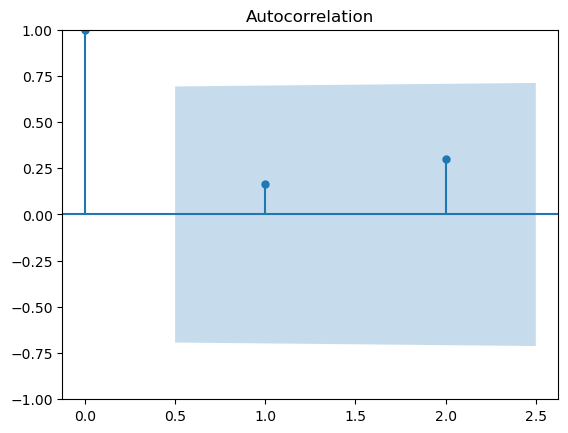

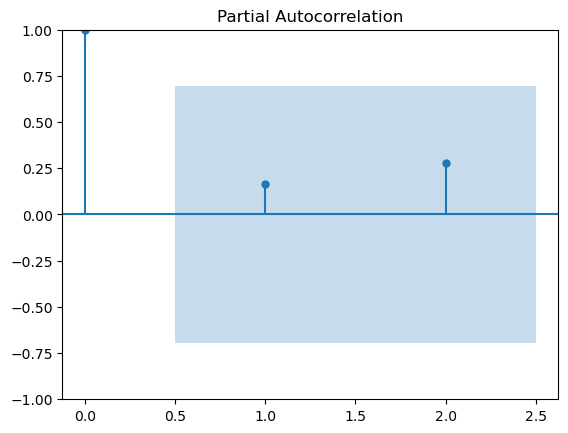

In [40]:
# First seasonal difference if D = 1
seasonal_diff = series.diff(3).dropna()

# Then regular differencing if d = 1
#diff_data = seasonal_diff.diff().dropna()

plot_acf(seasonal_diff, lags=2)
plot_pacf(seasonal_diff, lags=2)
plt.show()
